Please upload the sales_data.csv file:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving sales_data.csv to sales_data (4).csv

Preview of the dataset:
         Date      Time    StoreID   CustomerID Gender  OrderID  \
0  2024-11-02  00:20:05  Store0001  Cust0001001  Women     3982   
1  2024-11-02  00:20:05  Store0001  Cust0001001  Women     3982   
2  2024-06-10  00:20:05  Store0001  Cust0001001  Women     7154   
3  2024-06-10  00:20:05  Store0001  Cust0001001  Women     7154   
4  2024-06-10  00:20:05  Store0001  Cust0001001  Women     7154   

                  ProductName     Category   Price  Final Price  
0      White Blouse (Relaxed)        Shirt  107.77       86.216  
1        Green Leather Jacket       Jacket  240.55      240.550  
2  Black Dress Pants (Skinny)        Pants   70.71       70.710  
3                   Black Bag  Accessories  117.20      117.200  
4       Brown Pullover Hoodie       Hoodie   30.78       24.624  

Overall Top 10 Most Sold Products:
ProductName
Black Bag                1949
Brown Pullover Hoodie    1790
Black Sneakers          

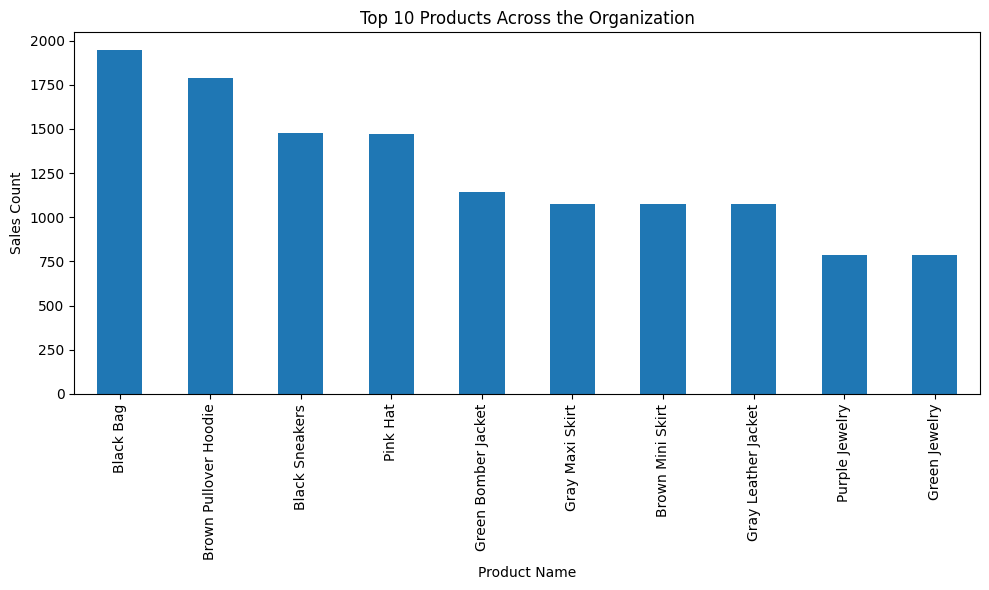

Streaming output truncated to the last 5000 lines.
Brown Denim Jacket                 3
Gray Dress (Loose Fit)             3
Pink Dress Shoes                   3
Brown Bomber Jacket                3
Red Sunglasses                     3
Red Maxi Skirt                     2
Name: count, dtype: int64

Top Products for Store Store0496:
ProductName
Pink Hat                              5
Purple Button-up Shirt (Loose Fit)    4
Gray Bomber Jacket                    4
Brown Pullover Hoodie                 4
Yellow Blazer                         3
Pink Denim Jacket                     3
Gray Maxi Skirt                       2
Gray Leather Jacket                   2
Red Zara Beauty                       2
Green Sneakers                        2
Name: count, dtype: int64

Top Products for Store Store0497:
ProductName
Pink Blazer                             4
Black Two-piece Suit (High-Waisted)     3
Yellow Maxi Skirt                       3
Yellow T-Shirt (Relaxed)                3
Brown Bomber 

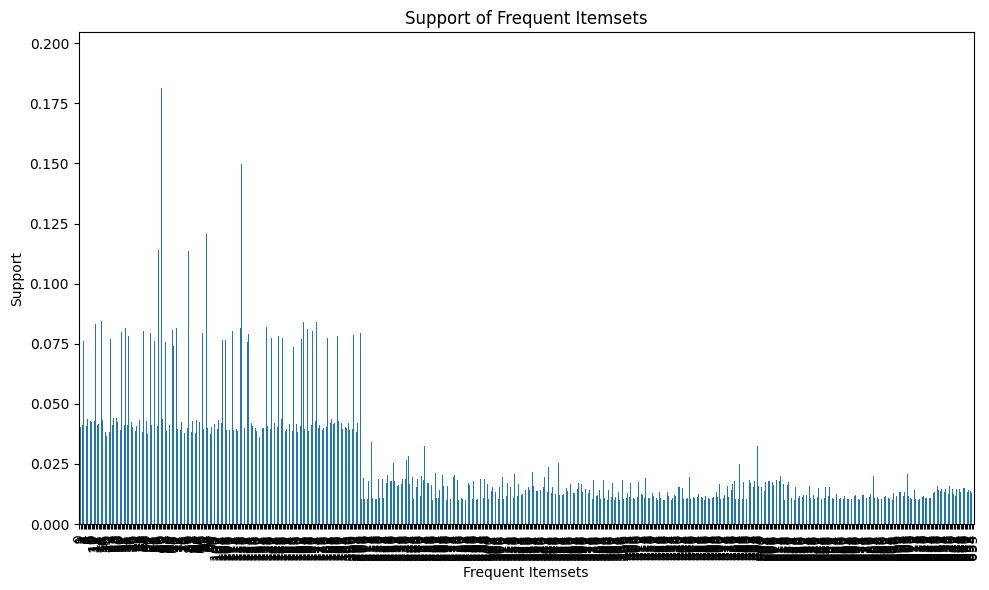


Analysis Complete. Insights are available above for organization-wide and store-specific trends, as well as market basket relationships.


In [4]:
# Market Basket Analysis Report

"""
## Market Basket Analysis Report

### **Introduction**
The objective of this project is to analyze the sales data of a corporation, focusing on the best-selling items across each store and the entire organization. By applying market basket analysis techniques, the goal is to identify frequently co-purchased items and derive actionable insights to improve inventory management, cross-selling strategies, and customer satisfaction.

### **Goals**
1. Identify the top 10 best-selling items across all stores.
2. Discover the best-selling items for each individual store.
3. Perform a market basket analysis to uncover frequent itemsets in customer purchases.
4. Generate association rules to highlight relationships between items.
5. Present findings with visualizations and summaries.

### **References to Previous Projects**
This analysis builds on insights and data preparation steps from the following projects:
- **[Project 1: Data Cleaning and Preparation](https://github.com/Daniel-251/Daniel_Alvarado_cis2100_project1)**:
  - Prepared the sales data by cleaning and ensuring accuracy in transaction details.
- **[Project 2: Sales Trends Analysis](https://github.com/Daniel-251/Daniel_Alvarado_cis2100_project2)**:
  - Identified key sales trends that provided foundational insights for analyzing customer behavior.
"""

# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from google.colab import files

# --- Step 1: Data Loading and Preparation ---
"""
## **Data Loading and Preparation**

### **Steps:**
1. Upload the `sales_data.csv` file containing transaction details.
2. Clean the data to handle missing values and ensure correct data types.
3. Organize the data into formats suitable for itemset mining and store-level analysis.

### Reference to Project 1:
- The data cleaning steps here reuse logic from **Project 1** to ensure consistency and accuracy in the analysis.
"""

# Upload the file
print("Please upload the sales_data.csv file:")
uploaded = files.upload()

# Load the uploaded file
file_path = 'sales_data.csv'  # Ensure this matches the uploaded file name
sales_data = pd.read_csv(file_path)

# Preview the dataset
print("\nPreview of the dataset:")
print(sales_data.head())

# Data cleaning
sales_data.dropna(inplace=True)
sales_data['OrderID'] = sales_data['OrderID'].astype(str)
sales_data['ProductName'] = sales_data['ProductName'].astype(str)
sales_data['StoreID'] = sales_data['StoreID'].astype(str)

# --- Step 2: Organization-Wide Analysis ---
"""
## **Organization-Wide Analysis**

### **Objective:**
Identify the overall best-selling items across the corporation to guide high-level inventory and promotional strategies.

### **Results:**
- The top 10 most sold products across all stores are displayed in a bar chart.

### Reference to Project 2:
- This analysis extends the trends identified in **Project 2** to provide a more comprehensive view of customer preferences across all stores.
"""

# Identify top-selling items across the organization
overall_top_products = sales_data['ProductName'].value_counts().head(10)
print("\nOverall Top 10 Most Sold Products:")
print(overall_top_products)

# Visualization
plt.figure(figsize=(10, 6))
overall_top_products.plot(kind='bar', title="Top 10 Products Across the Organization")
plt.xlabel("Product Name")
plt.ylabel("Sales Count")
plt.tight_layout()
plt.show()

# --- Step 3: Store-Specific Analysis ---
"""
## **Store-Specific Analysis**

### **Objective:**
Determine unique customer preferences for each store to tailor inventory and marketing at the local level.

### **Results:**
- A table for each store showing its top 10 best-selling items.
- Insights into regional product preferences.

### Reference to Project 2:
- The store-specific trends build on the foundational analysis of customer behavior performed in **Project 2**.
"""

print("\nStore-Specific Best Sellers:")
store_best_sellers = {}

for store in sales_data['StoreID'].unique():
    store_data = sales_data[sales_data['StoreID'] == store]
    top_products_store = store_data['ProductName'].value_counts().head(10)
    store_best_sellers[store] = top_products_store
    print(f"\nTop Products for Store {store}:")
    print(top_products_store)

# --- Step 4: Market Basket Analysis ---
"""
## **Market Basket Analysis**

### **Objective:**
Perform a market basket analysis to uncover frequently co-purchased items and item relationships using association rules.

### **Results:**
- Frequent itemsets mined using the Apriori algorithm.
- Association rules with support, confidence, and lift metrics.
- A bar chart visualizing the support of frequent itemsets.

### **Key Insights:**
- Popular product combinations and relationships that can inform cross-selling strategies.

### Reference to Projects:
- Data integrity from **Project 1** ensures accurate results.
- Customer trends from **Project 2** guide the focus of this market basket analysis.
"""

# Construct basket matrix
basket = sales_data.groupby(['OrderID', 'ProductName'])['ProductName'].count().unstack(fill_value=0)
basket = (basket > 0)  # Convert to boolean

# Perform frequent itemset mining
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="lift", min_threshold=1)

# Display frequent itemsets and association rules
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Visualization for support of frequent itemsets
plt.figure(figsize=(10, 6))
frequent_itemsets['support'].plot(kind='bar', title="Support of Frequent Itemsets")
plt.xlabel("Frequent Itemsets")
plt.ylabel("Support")
plt.tight_layout()
plt.show()

# --- Step 5: Summary and Recommendations ---

# Final Note
print("\nAnalysis Complete. Insights are available above for organization-wide and store-specific trends, as well as market basket relationships.")
